# Hierarchical Clustering Text

- Vamos a utilizar el dataset "The 30 newsgroups text datset"

In [1]:
# Librerías

from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\JManuel\anaconda
[nltk_data]     3\envs\ITESO_Anaconda\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = stopwords.words('english')

# Vamos a utilizar la librería string
stop_words = stop_words + list(string.printable)

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\JManuel\anaconda3\
[nltk_data]     envs\ITESO_Anaconda\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
lemmatizer = WordNetLemmatizer()

In [7]:
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

# Usando esas categorías vamos a construir nuestro dataset
news_data = fetch_20newsgroups(subset='train', # Seleccionamos el conjunto de textos a utilizar
                               categories = categories, # Usando la lista definifa para cargar un subconjunto de textos
                               shuffle=True, # Mezcla aleatoriamente los textos de cada categoría
                               random_state=42, # Parámetro para que sea reproducible
                               download_if_missing=True) # Descarga en caso de que no exista

In [8]:
# Verificamos que cada texto esté señalado con la categoría a la que pertenece
news_data.target

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [9]:
Counter(news_data.target)

Counter({0: 585, 1: 591, 2: 377})

In [10]:
news_data.target_names

['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [11]:
# COnvertimos nuestros dataset a un DataFrame para que la manipulación sea más sencilla
news_data_df = pd.DataFrame({'text': news_data['data'], 'category': news_data.target})
news_data_df

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0
...,...,...
1548,From: psyrobtw@ubvmsb.cc.buffalo.edu (Robert W...,2
1549,From: brian@lpl.arizona.edu (Brian Ceccarelli ...,2
1550,From: bmaraldo@watserv1.uwaterloo.ca (Commande...,0
1551,From: wtm@uhura.neoucom.edu (Bill Mayhew)\nSub...,1


In [13]:
# Verificamos que se mantienen los datos por categoría
news_data_df['category'].value_counts()

1    591
0    585
2    377
Name: category, dtype: int64

In [15]:
# Vamos a usar lambdas para limpiar el texto
news_data_df['clean_text'] = news_data_df['text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word.lower())
                       for word in word_tokenize(re.sub(r'([^\s\w|]_)+', ' ', str(x)))
                       if word.lower() not in stop_words])
)
news_data_df

,text,category,clean_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop.cit.wayne.edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes.acc.virginia.edu jason k. schechn...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386.schools.virginia.edu tony wayne s...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf.cc.utexas.edu bruce g. bostwick sub...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam cis.ohio-state.edu micah yoakam subjec...
...,...,...,...
1548,From: psyrobtw@ubvmsb.cc.buffalo.edu (Robert W...,2,psyrobtw ubvmsb.cc.buffalo.edu robert wei subj...
1549,From: brian@lpl.arizona.edu (Brian Ceccarelli ...,2,brian lpl.arizona.edu brian ceccarelli 602/621...
1550,From: bmaraldo@watserv1.uwaterloo.ca (Commande...,0,bmaraldo watserv1.uwaterloo.ca commander brett...
1551,From: wtm@uhura.neoucom.edu (Bill Mayhew)\nSub...,1,wtm uhura.neoucom.edu bill mayhew subject adco...


In [16]:
# Ya que tenemos el texto limpio vamos a construir la representación en TFIDF
# Generamos un modelo que toma solamente las 200 características más importantes

tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['clean_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435553,0.0,0.000000,0.0,0.000000,0.127745,0.136779,0.127521,0.13328,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113172,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.249879,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.140439,0.102891,0.099018,0.0
4,0.000000,0.0,0.215013,0.0,0.199323,0.189186,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


### Método de Ward para Clustering
- Comenzamos con 'n' clusters que contienen cada uno un objeto. Los clusters se combinan para formar uno sólo que contenga todos los objetos. En cada paso del proceso, se obtiene un nuevo cluster que minimiza la varianza, medida por un símbolo 'E'

- En cada iteración, este índice se calcula así:
    - Encontrar la media de cada cluster
    - Calcular la distancia entre cada objeto perteneciente al cluster y la media del cluster
    - Elevar al cuadrado la distancia del paso anterior
    - Sumar todas las distancias del paso anterior
    - Sumar las sumas de distancias (las distancias cuadradas de cada cluster)

Para que el método funcione se tiene que considerar todas las combinaciones posibles de clusters.

In [17]:
# Matriz de distancia
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist)
linkage_matrix

array([[1.41000000e+02, 6.77000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.98000000e+02, 6.15000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 4.17000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.09800000e+03, 3.10100000e+03, 3.47399011e+01, 9.41000000e+02],
       [3.10000000e+03, 3.10200000e+03, 4.53435997e+01, 1.13800000e+03],
       [3.09900000e+03, 3.10300000e+03, 5.69333331e+01, 1.55300000e+03]])

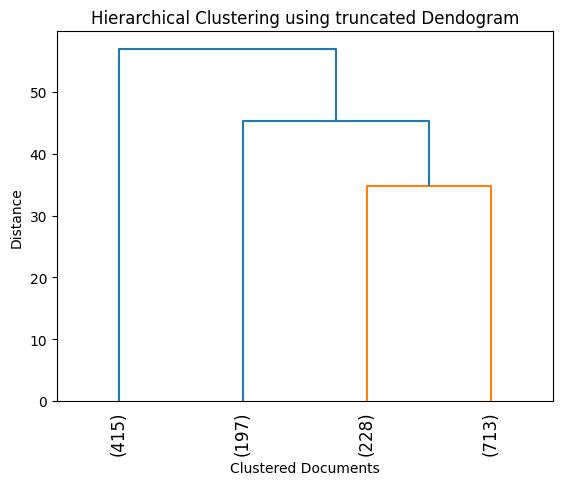

In [18]:
# Vamos a mostrar solamente 4 clusters
plt.title('Hierarchical Clustering using truncated Dendogram')
plt.xlabel('Clustered Documents')
plt.ylabel('Distance')

dendrogram(
    linkage_matrix,
    truncate_mode='lastp', # Muestra solo los últimos 'p' cluster obtenidos
    p=4, # 'p' es el número de clusters que haremos
    leaf_rotation=90,
    leaf_font_size=12
)
plt.show()

In [19]:
# Vamos a usar la función 'fcluster' (flat clustering) para obtener los clusters a partir de la matriz de linkage
k = 4
clusters = fcluster(linkage_matrix, k , criterion='maxclust')
clusters

array([1, 1, 1, ..., 4, 4, 1], dtype=int32)

In [20]:
# Agregando el número de clusters al Df
news_data_df['Clusters'] = clusters
news_data_df.head()

,text,category,clean_text,Clusters
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop.cit.wayne.edu steve teolis subject...,1
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes.acc.virginia.edu jason k. schechn...,1
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386.schools.virginia.edu tony wayne s...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf.cc.utexas.edu bruce g. bostwick sub...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam cis.ohio-state.edu micah yoakam subjec...,1


In [22]:
# Validamos contra las categorías
pd.crosstab(news_data_df['category'].replace({0:'misc.for.sale', 1:'sci.electronics', 2:'talk.religion.misc'}),
            news_data_df['Clusters'].replace({1:'cluster_1', 2:'cluster_2', 3:'cluster_3', 4:'cluster_4'}))

Clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.for.sale,227,1,187,170
sci.electronics,134,0,30,427
talk.religion.misc,54,196,11,116
